Wie viel werden Touristen in Tanzania ausgeben?

1) Daten von Website downloaden und Challenge lesen
2) Gemeinsames Repo anlegen und Collaboraters einladen
3) Notebook anlegen und Daten laden
4) Statistische Daten erfassen
5) Eval-Metrik festlegen
6) (kurzes) EDA
7) Baseline Modell trainieren und bewerten
8) (kurzes) Feature Engineering
9) Finales Modell trainieren und bewerten

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/Train.csv')


In [4]:
df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [ ]:

df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   str    
 1   country                4809 non-null   str    
 2   age_group              4809 non-null   str    
 3   travel_with            3695 non-null   str    
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   str    
 7   main_activity          4809 non-null   str    
 8   info_source            4809 non-null   str    
 9   tour_arrangement       4809 non-null   str    
 10  package_transport_int  4809 non-null   str    
 11  package_accomodation   4809 non-null   str    
 12  package_food           4809 non-null   str    
 13  package_transport_tz   4809 non-null   str    
 14  package_sightseeing    4809 non-null   str    
 15  package_guided_

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [5]:
df.isna().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [7]:
df['travel_with'].unique()

<StringArray>
['Friends/Relatives', nan, 'Alone', 'Spouse', 'Children',
 'Spouse and Children']
Length: 6, dtype: str

In [8]:
df['total_female'].unique()

array([ 1.,  0.,  2.,  4.,  3.,  5., 12., 10.,  6., nan, 11.,  7., 15.,
        9., 49.])

In [9]:
df['most_impressing'].unique()

<StringArray>
[                     'Friendly People',
 'Wonderful Country, Landscape, Nature',
                 'Excellent Experience',
                          'No comments',
                            ' Wildlife',
                                    nan,
                         'Good service',
         'Satisfies and Hope Come Back']
Length: 8, dtype: str

Wir werden das Projekt als Lineare Regression betrachten.  

Eval-Metrik:   
- Mean Absolut Error
Die großen Abweichungen sind nicht relavant deshalb haben wir diese Metrik ausgewählt. 


EDA

In [10]:
import seaborn as sns

<Axes: xlabel='travel_with', ylabel='total_cost'>

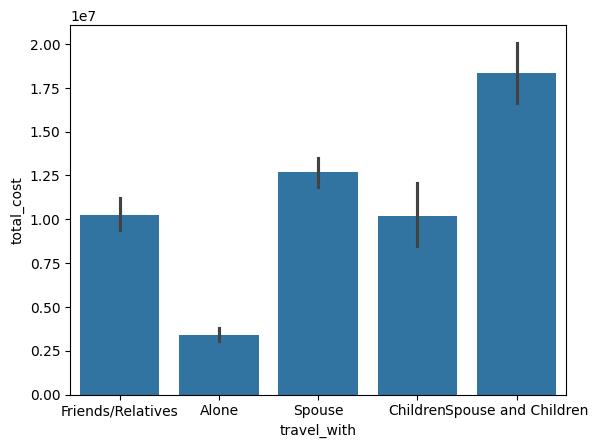

In [14]:
sns.barplot(x='travel_with', y='total_cost', data=df)

<Axes: xlabel='age_group', ylabel='total_cost'>

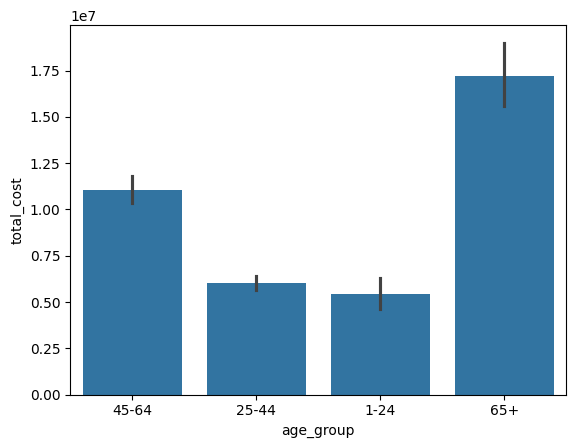

In [15]:
sns.barplot(x='age_group', y='total_cost', data=df)

<Axes: xlabel='total_cost', ylabel='None'>

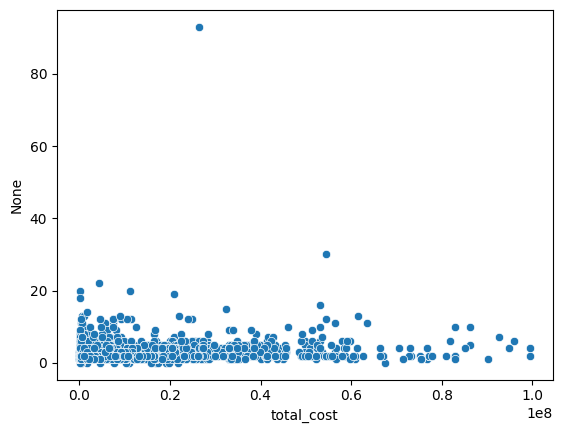

In [18]:
y= df['total_female'] + df.total_male
sns.scatterplot(x='total_cost', y=y, data=df)

<Axes: xlabel='None', ylabel='total_cost'>

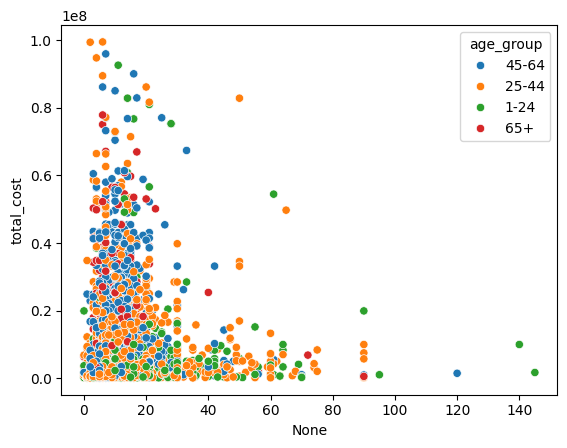

In [20]:
nights = df.night_mainland + df.night_zanzibar
sns.scatterplot(y='total_cost', x=nights, data=df, hue='age_group')